In [ ]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

from google.colab import files
uploaded = files.upload()

Saving typec_XTE1550.fits to typec_XTE1550.fits


In [ ]:
file_name = "typec_XTE1550.fits"

In [ ]:
hdulist = fits.open(file_name)
print(hdulist.info())
time_list = hdulist[1].data["TIME"].tolist()
count_list = hdulist[1].data["COUNTS"].tolist()
hdulist.close()

Filename: typec_XTE1550.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   ()      
  1  COUNTS        1 BinTableHDU     76   489472R x 4C   [1D, 1D, 1D, 1D]   
  2  STDGTI        1 BinTableHDU     41   1R x 2C   [1D, 1D]   
None


In [ ]:
#fourier transform
tres = time_list[1]-time_list[0]
tlen= time_list[len(time_list)-1]-time_list[0]


numb = len(time_list)
flen = int((fmax-fres)/fres+1)
fres = 1/tlen
fmax = 1./(2*tres)

freq = np.linspace(fres,fmax,int((fmax-fres)/fres+1))

transf = np.fft.fft(count_list)
powspec = 2.0*abs(transf[1:int(flen)+1])*abs(transf[1:int(flen)+1])/sum(np.array(count_list)*tres)


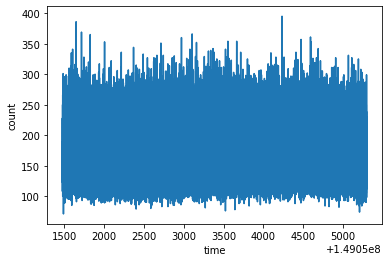

244735 244735


Text(0, 0.5, 'powspec')

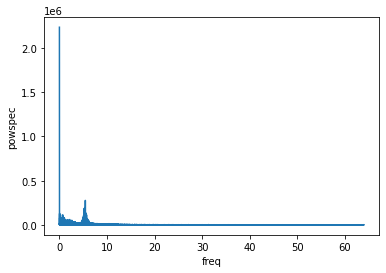

In [ ]:
#plotting

#without FT
plt.plot(time_list, count_list)
plt.ylabel("count")
plt.xlabel("time")
plt.show()


#with FT
print(len(freq), len(powspec))

plt.plot(freq,powspec)
plt.xlabel("freq")
plt.ylabel("powspec")

""" UPDATES
flen updated
powspec su sekilde: powspec = 2.0*abs(transf[1:int(flen)+1])*abs(transf[1:int(flen)+1])/sum(np.array(count_list)*tres)


"""